# Matplotlib

Prvo učitamo biblioteku, i kažemo da će se slike renderirati u bilježnici, ali praćene kao zasebni objekti. `%matplotlib inline` ima negativnu stranu da sve vezano uz pojedinu sliku moramo napisati u jednoj ćeliji; ne možemo graditi sliku "po dijelovima" i onda je samo jednom prikazati. Tako je puno teže učiti što se zbiva.

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.max_open_warning'] = 50
%matplotlib agg
%matplotlib -l

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


Matplotlib ima nekoliko načina upotrebe. Najjednostavniji, direktno preko `plt.` metodâ (kao što je `plt.plot`), pretpostavlja da u svakom trenutku imamo jednu sliku na kojoj implicitno radimo (vezanu uz ćeliju u kojoj smo) --- na kraju izvršavanja ćelije se ta slika renderira u bilježnicu. Taj pristup je u redu za način rada `inline`, ali je prilično beskoristan u ostalim slučajevima. Zato ćemo pokazati "objektni" način, gdje možemo na sliku i njene elemente referirati kao što je uobičajeno u Pythonu: preko imena objekata.

[Postoji jedan problem s takvim pristupom: kako su sva ta imena u globalnom prostoru, Python nikad ne može *garbage collect*ati te grafičke objekte, a oni zauzimaju puno memorije. Zato nas Jupyter upozori nakon proizvodnje 20 slika da ručno zaboravimo određene grafike, npr. naredbom `del`. No možemo i podesiti taj broj: recimo, gore smo ga postavili na `50` (to je ovo svojstvo `figure.max_open_warning`).]

Tradicionalni nazivi za objekte koji omogućuju crtanje su `fig` (*figure*: sâma površina po kojoj se crta) i `ax` (*axes*: koordinatni sustav koji posjeduje brojne metode za crtanje).

## Neke često korištene opcije

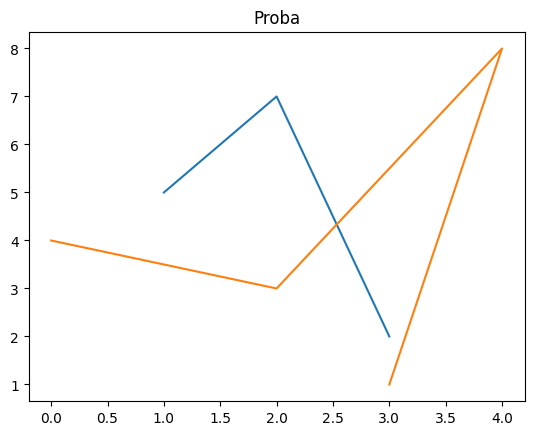

In [2]:
fig1, ax1 = plt.subplots()
ax1.set_title('Proba')
ax1.plot([1, 2, 3], [5, 7, 2])
ax1.plot([3, 4, 2, 0], [1, 8, 3, 4])
fig1

Metodu `plot` smo već upoznali; ona prima dvije jednako dugačke liste (ili `array`a) apscisâ i ordinatâ, crta odgovarajuće točke i spaja ih linijom. [Mnoge druge metode](https://matplotlib.org/api/axes_api.html#basic) imaju slično sučelje, pa ćemo prikazivati kako ono funkcionira uglavnom na primjeru metode `plot`.

Pored obaveznih parametara (liste `x`eva i `y`ova), možemo dati još mnoge [imenovane parametre](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) koji određuju stil. Ako to ne učinimo, Matplotlib će automatski različitim linijama dodijeliti različite stilove.

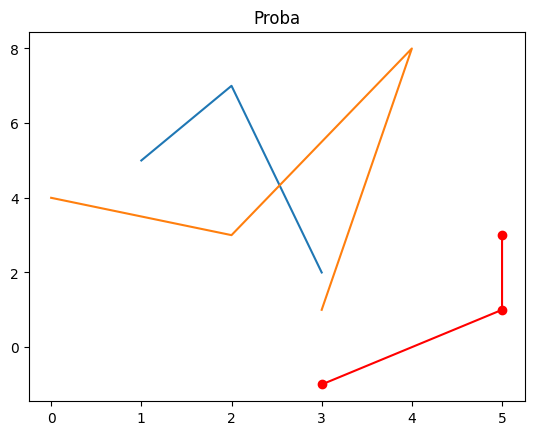

In [3]:
ax1.plot([3, 5, 5], [-1, 1, 3], color='red', marker='o')
fig1

Vidimo da je Python zapamtio objekte `ax1` i `fig1`, tako da ih možemo nadograđivati i nanovo prikazivati.

Pomoću metodâ `set_x`... i `set_y`... možemo postavljati razna svojstva $x$- i $y$-osi. Recimo, oznaku i granice.

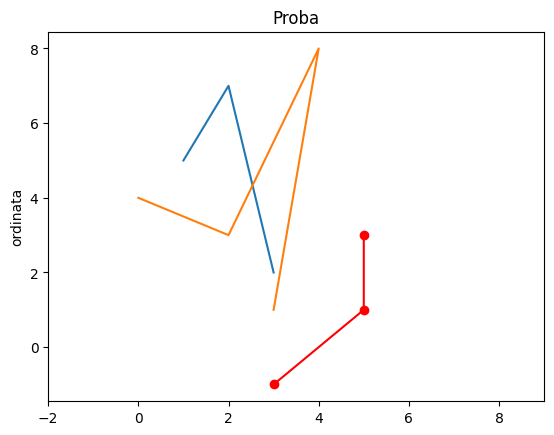

In [4]:
ax1.set_ylabel('ordinata')
ax1.set_xlim(-2, 9)
fig1

## Više grafova na jednoj slici

Napravimo novu sliku, koja se sastoji od dva koordinatna sustava. Vidimo iz gornjeg da se `xlim` i `ylim` (granice) postavljaju automatski tako da obuhvate sve nacrtane točke. Pomoću `sharex` i `sharey` možemo povezati `xlim` odnosno `ylim` svih proizvedenih grafova, tako da se uvijek kreću u istim granicama.

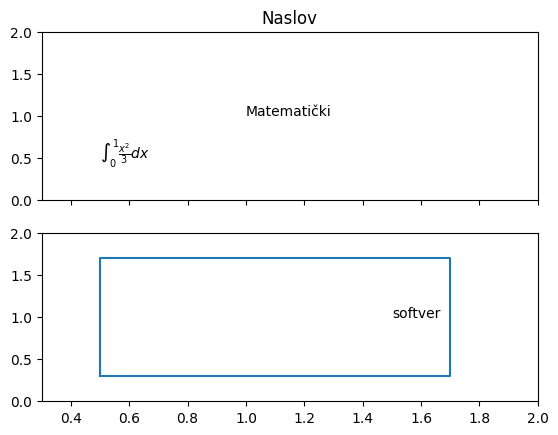

In [5]:
fig2, (ax11, ax21) = plt.subplots(2, sharex=True, sharey=True)
ax11.set(xlim=(0.3, 2), ylim=(0, 2), title='Naslov')
ax11.text(1, 1, 'Matematički')
ax21.text(1.5, 1, 'softver')
ax21.plot([0.5, 1.7, 1.7, 0.5, 0.5], [0.3, 0.3, 1.7, 1.7, 0.3])
ax11.text(0.5, 0.5, r'$\int_0^1\frac{x^2}{3}dx$')
fig2

Vidimo da oznake (za legendu) mogu biti i pisane u $\LaTeX$u, kao `r'$...$'`. (`r` isključuje Pythonovo tretiranje `\` kao *escape*-znaka, jer se često koristi u $\LaTeX$-naredbama -- također je koristan iz istog razloga kod pisanja regularnih izraza, stazâ u Windowsima itd.)

Također vidimo da ako samo damo jedan argument za `.subplots`, dobit ćemo koordinatne sustave u stupcu. Ako ih želimo u retku ili općenito nekakvoj matrici s više stupaca, moramo zadati dva broja: broj redaka i broj stupaca.

Pomoću Numpyjevog `linspace` i broadcastanih operatora lako možemo crtati grafove funkcijâ. Primijetite koliko parametar `sharey` ovdje pomaže: pokušajte ga postaviti na `False` i usporedite slike.

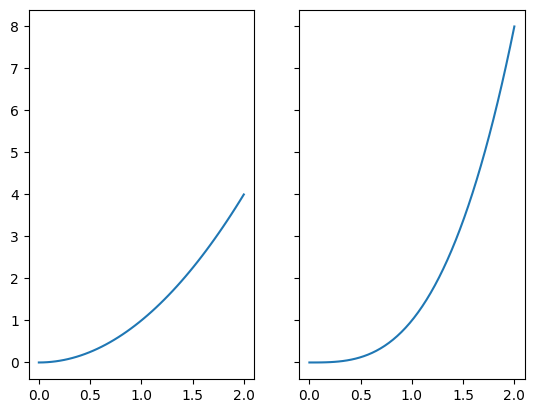

In [6]:
import numpy as np
fig3, (lijevo, desno) = plt.subplots(1, 2, sharey=True)
x = np.linspace(0, 2)
lijevo.plot(x, x**2)
desno.plot(x, x**3)
fig3

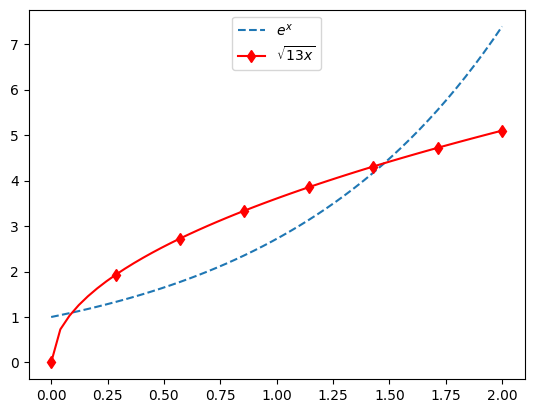

In [7]:
fig4, ax4 = plt.subplots()
ax4.plot(x, np.exp(x), label=r'$e^{x}$', linestyle='--')
ax4.plot(x, np.sqrt(13 * x), label=r'$\sqrt{13x}$', 
         color='red', marker='d', markevery=7)
ax4.legend(loc='upper center')
fig4

In [8]:
plt.Line2D.set_linestyle?

Pogledajmo i jednu matricu grafova, tipa 2×3. `xbez0` je, kao što mu ime kaže, domena (`[0,7]`) bez lijevog kraja, kako bismo mogli crtati logaritam i recipročnu vrijednost bez grešaka.

Kao što možemo crtati eksplicitno zadane krivulje s `.plot(x, f(x))`, možemo i parametarski zadane krivulje kao `.plot(x(t), y(t))`. Naravno, automatsko postavljanje `xlim` i `ylim` ne čuva *aspect ratio* -- ako želimo da kružnica doista izgleda kao kružnica, moramo preciznije namjestiti osi.

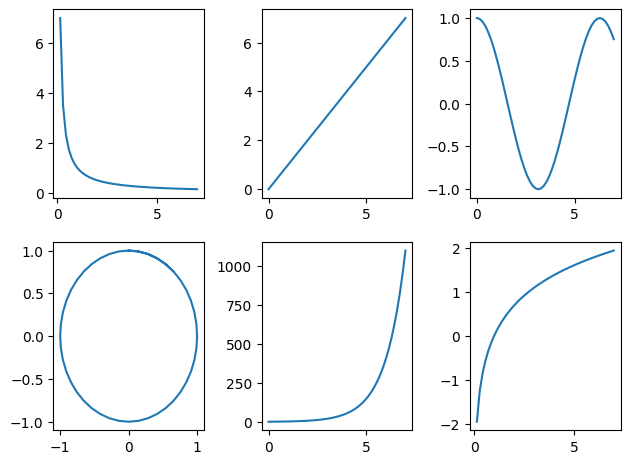

In [9]:
fig6, ((gl, gs, gd), 
       (dl, ds, dd)) = plt.subplots(2, 3)
fig6.tight_layout()
x = np.linspace(0, 7)
xbez0 = x[1:]
gl.plot(xbez0, 1/xbez0)
gs.plot(x, x)
gd.plot(x, np.cos(x))
dl.plot(np.sin(x), np.cos(x))
ds.plot(x, np.exp(x))
dd.plot(xbez0, np.log(xbez0))
fig6

## Prikaz matrica

Metoda `.imshow` služi za prikaz slika ili bilo kakvih matricâ (primijetimo pažljivo odabrane granice i smjer osi ordinata, kako bi svi "pikseli" bili jednako veliki, i redoslijedom odgovarali prikazu matrice). `cmap='gray'` postavlja nijanse sive kao *colormap*: manji brojevi su tamniji, veći svijetliji.

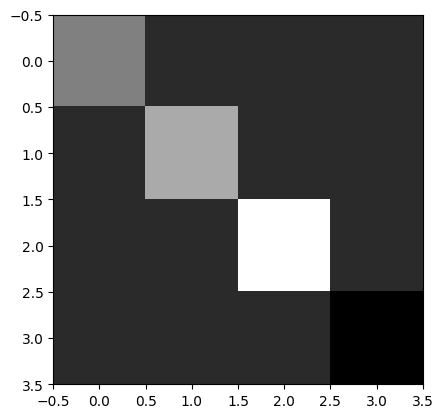

In [10]:
dijagonalna = np.diag([2, 3, 5, -1])
figmat, axmat = plt.subplots()
axmat.imshow(dijagonalna, cmap='gray')
figmat

In [11]:
astro = plt.imread('thumb.png')
astro.shape

(100, 100, 3)

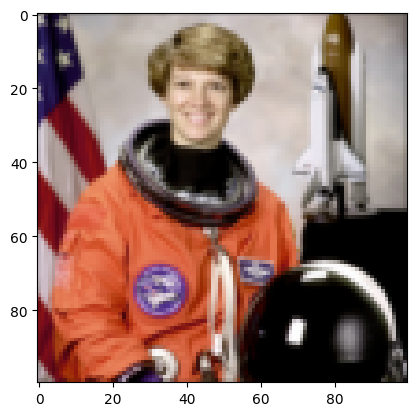

In [12]:
figa, axa = plt.subplots()
axa.imshow(astro)
figa

`astro` je najobičniji Numpy array dubine 3, a ako ga srežemo na dubinu 2 (matrica), možemo i zadati [colormap](https://matplotlib.org/examples/color/colormaps_reference.html) koji kaže kako će se brojčane vrijednosti prikazivati.

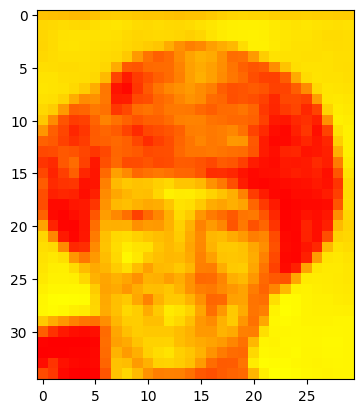

In [13]:
axa.imshow(astro[:35, 30:60, 2], cmap='autumn')
figa

Još neki zanimljivi primjeri mogu se naći na https://matplotlib.org/tutorials/introductory/images.html. Svakako pročitajte!

Pogledajmo histogram distribucije rezultata (zbroja) bacanja triju kocaka.

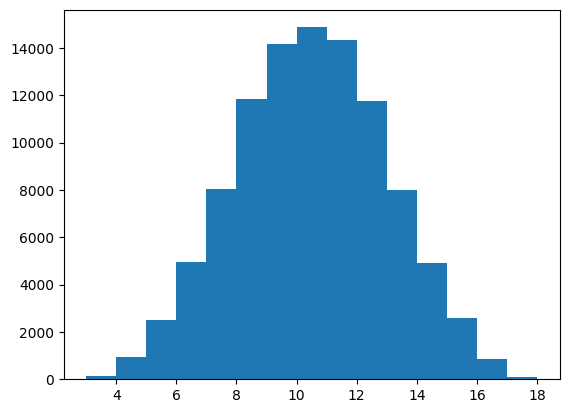

In [14]:
tri_kocke = np.random.uniform(1, 6, (100_000, 3)).sum(axis=1)
slika, koord = plt.subplots()
koord.hist(tri_kocke, bins=range(3, 19))
slika

## Stilovi

Pored uobičajenog, Matplotlib podržava razne stilove. Evo jednog dobro poznatog:

[Za puni doživljaj, trebalo bi i instalirati odgovarajući [font](https://github.com/ipython/xkcd-font).]

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


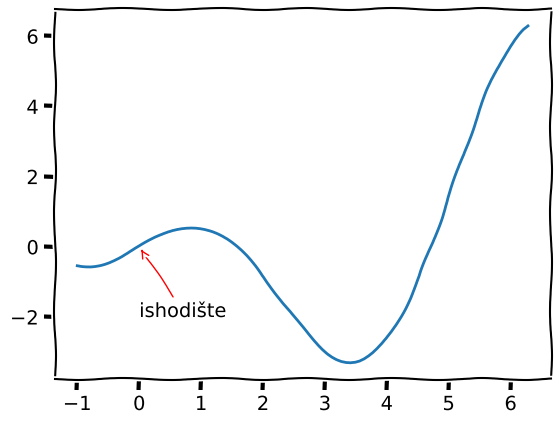

In [15]:
with plt.xkcd():
    figxkcd, axkcd = plt.subplots()
    x = np.linspace(-1, 2*np.pi, 100)
    axkcd.plot(x, x*np.cos(x))
    axkcd.annotate('ishodište', (0, 0), (0, -2), 
                   arrowprops=dict(arrowstyle='->', color='red'))
figxkcd

A evo i jednog ozbiljnijeg: (Seaborn je [poznata tema](https://towardsdatascience.com/matplotlib-seaborn-basics-2bd7b66dbee2) među *data scientist*ima.)

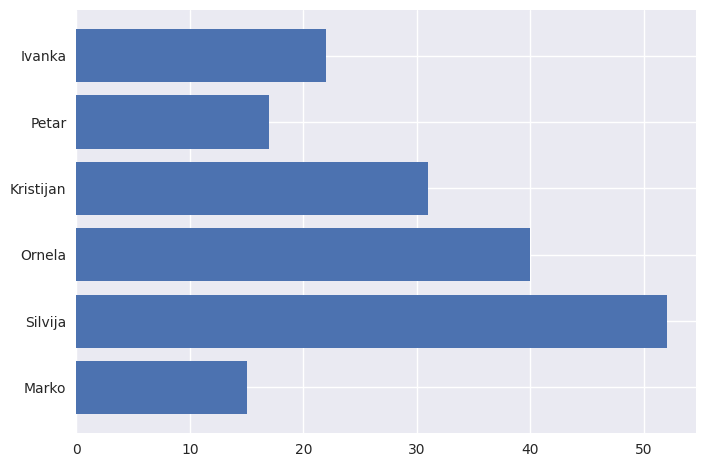

In [16]:
bodovi = {
    'Marko': 15,
    'Silvija': 52,
    'Ornela': 40,
    'Kristijan': 31,
    'Petar': 17,
    'Ivanka': 22,
}
with plt.style.context('seaborn'):
    slika, crtaj = plt.subplots()
    crtaj.barh(list(bodovi.keys()), list(bodovi.values()))
slika

In [17]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Sjećate li se `fig6`? (Jupyter se sjeća.;) Pogledajmo u kojim je sve formatima možemo spremiti, i spremimo je u formatu PDF.

In [18]:
fig6.canvas.get_supported_filetypes_grouped()

{'Encapsulated Postscript': ['eps'],
 'Joint Photographic Experts Group': ['jpeg', 'jpg'],
 'Portable Document Format': ['pdf'],
 'PGF code for LaTeX': ['pgf'],
 'Portable Network Graphics': ['png'],
 'Postscript': ['ps'],
 'Raw RGBA bitmap': ['raw', 'rgba'],
 'Scalable Vector Graphics': ['svg', 'svgz'],
 'Tagged Image File Format': ['tif', 'tiff']}

In [19]:
fig6.savefig('6 grafova.pdf')

## 3D

Za kraj pogledajmo kako se Matplotlib nosi s trodimenzijskom grafikom.

Numpyjev `meshgrid` je svojevrsni "produkt" dva `linspace`a (ili bilo kakvih vektora), koji replicira jedan operand duž jedne osi, a drugi duž druge.

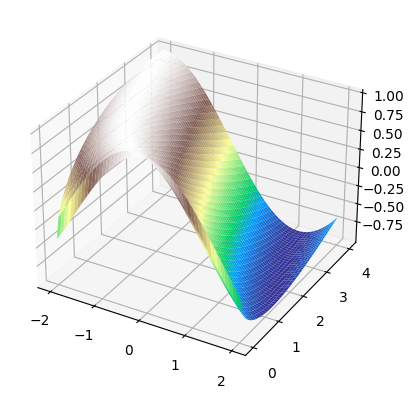

In [20]:
from mpl_toolkits import mplot3d
fig3d, ax3d = plt.subplots(subplot_kw=dict(projection='3d'))
x, y = np.meshgrid(np.linspace(-2, 2), np.linspace(0, 4))
z = np.cos(x + np.sqrt(y))
ax3d.plot_surface(x, y, z, cmap='terrain', linewidth=1)
fig3d

## Reference

Više o vrstama grafova na https://matplotlib.org/tutorials/introductory/sample_plots.html.

Detaljnije o slikama na https://matplotlib.org/tutorials/introductory/lifecycle.html.